# Lab 1 Analysis Example using Thicket

In [9]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [10]:
tk = th.Thicket.from_caliperreader(glob("random/*.cali"))

In [11]:
# Performance data
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              1228831       1   
                                                  64252945      1   
                                                  104222497     1   
                                                  1100646857    1   
                                                  1844798675    1   
                                                  2531548183    1   
                                                  2587333277    1   
                                                  2637264606    1   
                                                  3429872775    1   
                                                  4050321919    1   
{'name': 'comm', 'type': 'function'}              1228831       3   
                                                  64252945      3   
                                                  104222497     3   
                                                  1100646857    3   
                                                  1844798675    3   
                                                  2531548183    3   
                                                  2587333277    3   
                                                  2637264606    3   
                                                  3429872775    3   
                                                  4050321919    3   
{'name': 'MPI_Barrier', 'type': 'function'}       1228831       8   
                                                  64252945      8   
                                                  104222497     8   
                                                  1100646857    8   
                                                  1844798675    8   
                                                  2531548183    8   
                                                  2587333277    8   
                                                  2637264606    8   
                                                  3429872775    8   
                                                  4050321919    8   
{'name': 'comm_large', 'type': 'function'}        1228831       4   
                                                  64252945      4   
                                                  104222497     4   
                                                  1100646857    4   
                                                  1844798675    4   
                                                  2531548183    4   
                                                  2587333277    4   
                                                  2637264606    4   
                                                  3429872775    4   
                                                  4050321919    4   
{'name': 'MPI_Gather', 'type': 'function'}        1228831       9   
                                                  64252945      9   
                                                  104222497     9   
                                                  1100646857    9   
                                                  1844798675    9   
                                                  2531548183    9   
                                                  2587333277    9   
                                                  2637264606    9   
                                                  3429872775    9   
                                                  4050321919    9   
{'name': 'MPI_Scatter', 'type': 'function'}       1228831       5   
                                                  64252945      5   
                                                  104222497     5   
                                                  1100646857    5   
                                                  1844798675    5   
                                                  2531548183    5   
                                                  2587333277

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [12]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
1228831,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v1.cali,1701285299,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 1]",g,Quick sort,MPI,int,4,65536,Reversed,1,4,AI
64252945,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v32.cali,1701288312,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 32]",g,Quick sort,MPI,int,4,65536,Reversed,32,4,AI
104222497,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v16.cali,1701288287,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 16]",g,Quick sort,MPI,int,4,65536,Reversed,16,4,AI
1100646857,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t262144-v64.cali,1701288649,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 262144, 64]",g,Quick sort,MPI,int,4,262144,Reversed,64,4,AI
1844798675,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t262144-v1.cali,1701285299,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 262144, 1]",g,Quick sort,MPI,int,4,262144,Reversed,1,4,AI
2531548183,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v64.cali,1701288310,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 64]",g,Quick sort,MPI,int,4,65536,Reversed,64,4,AI
2587333277,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t262144-v2.cali,1701288649,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 262144, 2]",g,Quick sort,MPI,int,4,262144,Reversed,2,4,AI
2637264606,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v2.cali,1701288257,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 2]",g,Quick sort,MPI,int,4,65536,Reversed,2,4,AI
3429872775,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v8.cali,1701288287,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 8]",g,Quick sort,MPI,int,4,65536,Reversed,8,4,AI


In [13]:
tk.statsframe.dataframe["time"] = 1
tk.tree()

"  _____ _     _      _        _   \n |_   _| |__ (_) ___| | _____| |_ \n   | | | '_ \\| |/ __| |/ / _ \\ __|\n   | | | | | | | (__|   <  __/ |_ \n   |_| |_| |_|_|\\___|_|\\_\\___|\\__|  v2023.3.0\n\n\x1b1.000\x1b main\x1b\n├─ \x1b1.000\x1b comm\x1b\n│  ├─ \x1b1.000\x1b MPI_Barrier\x1b\n│  └─ \x1b1.000\x1b comm_large\x1b\n│     ├─ \x1b1.000\x1b MPI_Gather\x1b\n│     └─ \x1b1.000\x1b MPI_Scatter\x1b\n├─ \x1b1.000\x1b comp\x1b\n│  └─ \x1b1.000\x1b comp_large\x1b\n├─ \x1b1.000\x1b correctness_check\x1b\n└─ \x1b1.000\x1b data_init\x1b\n\n\x1bLegend\x1b (Metric: time Min: 1.00 Max: 1.00)\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\nname\x1b User code    \x1b◀ \x1b Only in left graph    \x1b▶ \x1b Only in right graph\n"

In [14]:
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 MPI_Barrier
│  └─ 1.000 comm_large
│     ├─ 1.000 MPI_Gather
│     └─ 1.000 MPI_Scatter
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [15]:
gb = tk.groupby("InputSize")

2  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2ae3946c9df0>, 262144: <thicket.thicket.Thicket object at 0x2ae3947393a0>}


In [16]:
print(gb)

{65536: <thicket.thicket.Thicket object at 0x2ae3946c9df0>, 262144: <thicket.thicket.Thicket object at 0x2ae3947393a0>}


In [17]:
print(gb.values())


dict_values([<thicket.thicket.Thicket object at 0x2ae3946c9df0>, <thicket.thicket.Thicket object at 0x2ae3947393a0>])


Compose these 3 groups column-wise to get a holistic view of the data

In [36]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [37]:
ctk.dataframe

65536  \
                                                              nid   
node                                              num_procs         
{'name': 'main', 'type': 'function'}              1             1   
                                                  2             1   
                                                  4             1   
                                                  8             1   
                                                  16            1   
                                                  32            1   
                                                  64            1   
{'name': 'comm', 'type': 'function'}              1             3   
                                                  2             3   
                                                  4             3   
                                                  8             3   
                                                  16            3   
                                                  32            3   
                                                  64            3   
{'name': 'MPI_Barrier', 'type': 'function'}       1             8   
                                                  2             8   
                                                  4             8   
                                                  8             8   
                                                  16            8   
                                                  32            8   
                                                  64            8   
{'name': 'comm_large', 'type': 'function'}        1             4   
                                                  2             4   
                                                  4             4   
                                                  8             4   
                                                  16            4   
                                                  32            4   
                                                  64            4   
{'name': 'MPI_Gather', 'type': 'function'}        1             9   
                                                  2             9   
                                                  4             9   
                                                  8             9   
                                                  16            9   
                                                  32            9   
                                                  64            9   
{'name': 'MPI_Scatter', 'type': 'function'}       1             5   
                                                  2             5   
                                                  4             5   
                                                  8             5   
                                                  16            5   
                                                  32            5   
                                                  64            5   
{'name': 'comp', 'type': 'function'}              1             6   
                                                  2             6   
                                                  4             6   
                                                  8             6   
                                                  16            6   
                                                  32            6   
                                                  64            6   
{'name': 'comp_large', 'type': 'function'}        1             7   
                                                  2             7   
                                                  4             7   
                                                  8             7   
                                                  16            7   
                                                  32            7   
                                                  64      

In [38]:
ctk.dataframe = ctk.dataframe.dropna()

Perform pandas operations to get the table in a desirable format for plotting

In [39]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "nid"), (262144, "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])


In [40]:
# Drop unwanted columns
# ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (65536, "nid"), (65536, "nid"), (65536, "nid")], axis=1)

# ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel")], axis=1)
# ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)
# Rename index to remove tuple
# ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
# # Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [41]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [42]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Min time/rank"), (262144, "Min time/rank")], axis=1)

In [43]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Max time/rank"), (262144, "Max time/rank")], axis=1)

In [44]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Total time"), (262144, "Total time")], axis=1)

In [45]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])


In [46]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

In [47]:
ctk.dataframe

65536        262144
                            Avg time/rank Avg time/rank
name              num_procs                            
main              1             12.310717    185.844254
                  2             12.289328    186.115255
                  64            12.194789    186.046847
comm              1              0.008531      0.007019
                  2              0.006173      0.001798
                  64             0.000810      0.005798
MPI_Barrier       1              0.001238      0.001065
                  2              0.000962      0.000054
                  64             0.000057      0.000794
comm_large        1              0.007246      0.005913
                  2              0.005161      0.001694
                  64             0.000687      0.004955
MPI_Gather        1              0.002753      0.001562
                  2              0.001081      0.000711
                  64             0.000238      0.001901
MPI_Scatter       1              0.004451      0.004314
                  2              0.004043      0.000944
                  64             0.000402      0.003008
comp              1             11.663648    185.148344
                  2             11.623534    185.436238
                  64            11.668105    185.360212
comp_large        1             11.663571    185.148258
                  2             11.623452    185.436145
                  64            11.668016    185.360118
correctness_check 1              0.000253      0.001075
                  2              0.000269      0.015496
                  64             0.000283      0.025946
data_init         1              0.002471      0.010726
                  2              0.002543      0.016232
                  64             0.004150      0.009408

In [48]:
function_names = set(ctk.dataframe.index.get_level_values('name'))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [49]:
df_1 = ctk.dataframe.loc['main',(65536)] # both column and row
# df_1

# df_1 = ctk.dataframe.loc[:,(65536)] # all rows 1 column
# df_1

# df_1 = ctk.dataframe.loc['main'] # all rows 1 column
# df_1 = ctk.dataframe
df_1

# df_1 = df_1.loc[]

# df_2 = df_1.loc[[64,128,256,512]]
# df_2

# df_1 = ctk.dataframe.loc['main'] # all columns 1 row


# df_2 =  ctk.dataframe.reset_index().drop([(262144),(1048576),(4194304)], axis=1)
# df_2

,Avg time/rank
num_procs,
1,12.310717
2,12.289328
64,12.194789


In [50]:
# import matplotlib.pyplot as plt
def plot_pandas(df, title, xlabel, ylabel, loglog,figsize=(20, 20) ):
    plt.figure(figsize=figsize)
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
        
    )
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()  
    return plot

<Figure size 1440x1440 with 0 Axes>

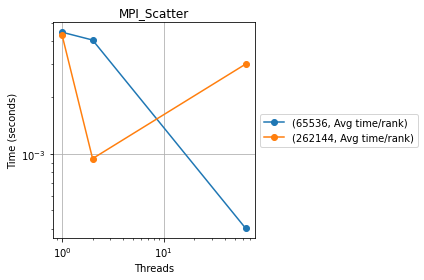

<Figure size 1440x1440 with 0 Axes>

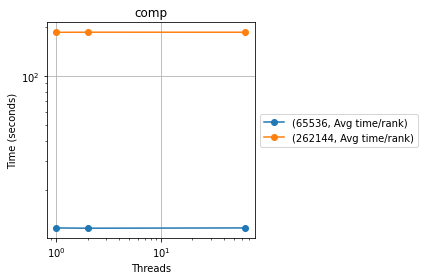

<Figure size 1440x1440 with 0 Axes>

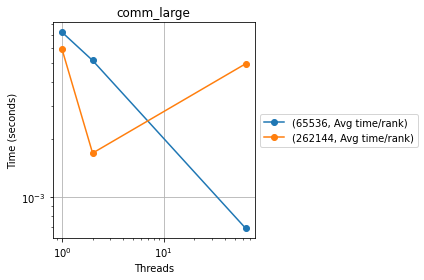

<Figure size 1440x1440 with 0 Axes>

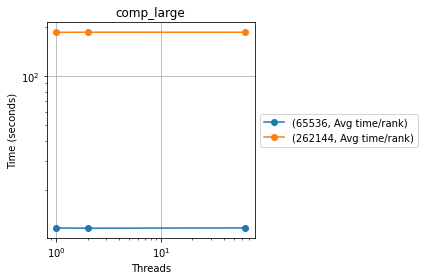

<Figure size 1440x1440 with 0 Axes>

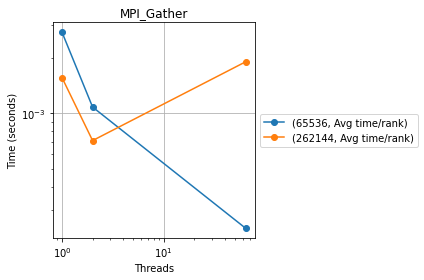

<Figure size 1440x1440 with 0 Axes>

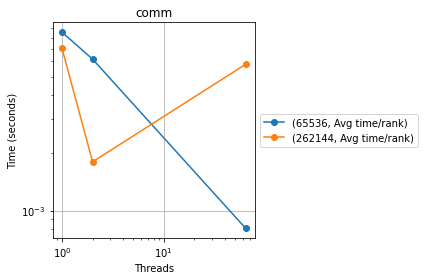

<Figure size 1440x1440 with 0 Axes>

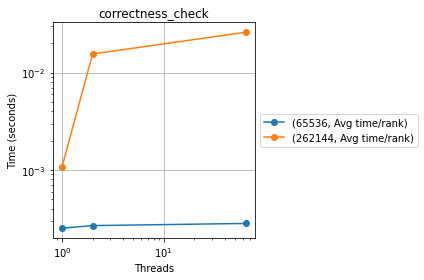

<Figure size 1440x1440 with 0 Axes>

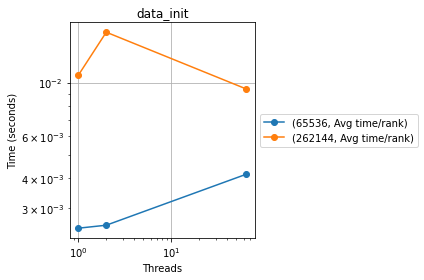

<Figure size 1440x1440 with 0 Axes>

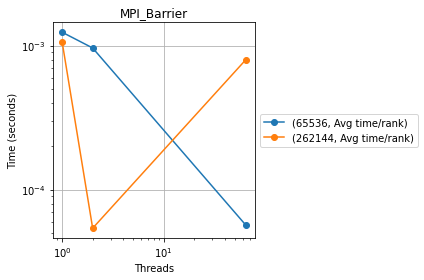

<Figure size 1440x1440 with 0 Axes>

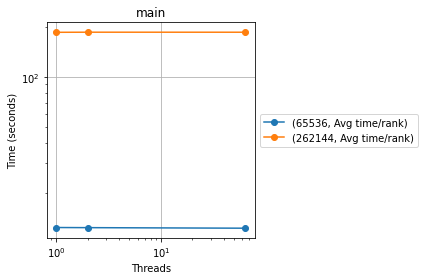

In [52]:
# # for matrix in matrix_sizes:
    
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True,
        figsize=(20, 20)
    )
    plt.show()

In [34]:
# ctk.dataframe

## SPEEDUP


In [53]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("num_procs", axis=1).set_index("name")/ctk.dataframe

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [54]:
speedup_df

65536        262144
                            Avg time/rank Avg time/rank
name              num_procs                            
main              1              1.000000      1.000000
                  2              1.001740      0.998544
                  64             1.009506      0.998911
comm              1              1.000000      1.000000
                  2              1.381986      3.903782
                  64            10.532099      1.210590
MPI_Barrier       1              1.000000      1.000000
                  2              1.286902     19.722222
                  64            21.719298      1.341310
comm_large        1              1.000000      1.000000
                  2              1.403991      3.490555
                  64            10.547307      1.193340
MPI_Gather        1              1.000000      1.000000
                  2              2.546716      2.196906
                  64            11.567227      0.821673
MPI_Scatter       1              1.000000      1.000000
                  2              1.100915      4.569915
                  64            11.072139      1.434176
comp              1              1.000000      1.000000
                  2              1.003451      0.998447
                  64             0.999618      0.998857
comp_large        1              1.000000      1.000000
                  2              1.003452      0.998448
                  64             0.999619      0.998857
correctness_check 1              1.000000      1.000000
                  2              0.940520      0.069373
                  64             0.893993      0.041432
data_init         1              1.000000      1.000000
                  2              0.971687      0.660793
                  64             0.595422      1.140094

<Figure size 1440x1440 with 0 Axes>

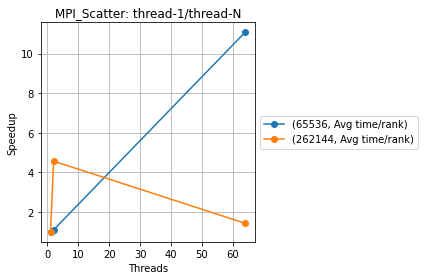

<Figure size 1440x1440 with 0 Axes>

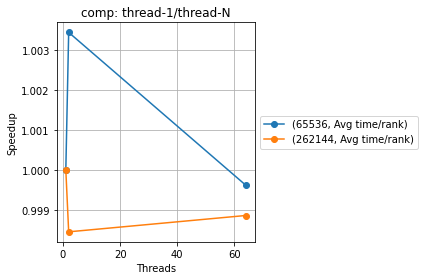

<Figure size 1440x1440 with 0 Axes>

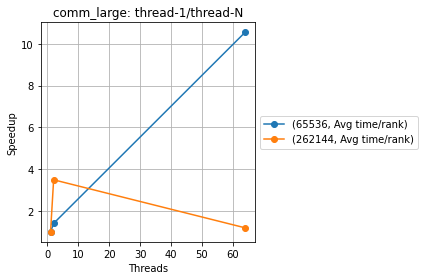

<Figure size 1440x1440 with 0 Axes>

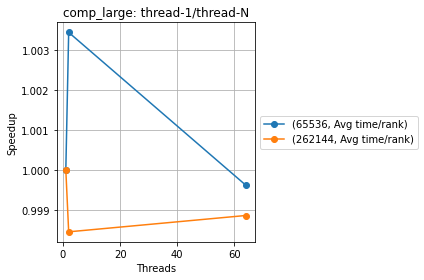

<Figure size 1440x1440 with 0 Axes>

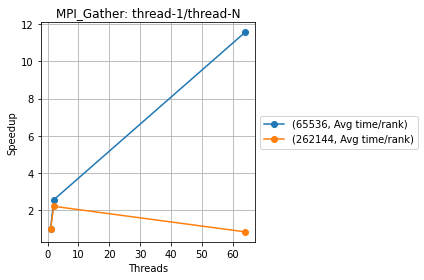

<Figure size 1440x1440 with 0 Axes>

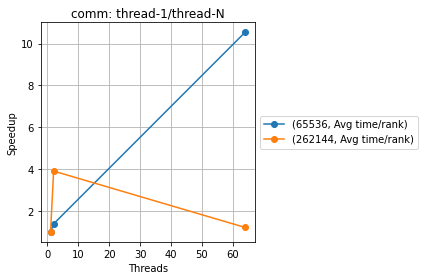

<Figure size 1440x1440 with 0 Axes>

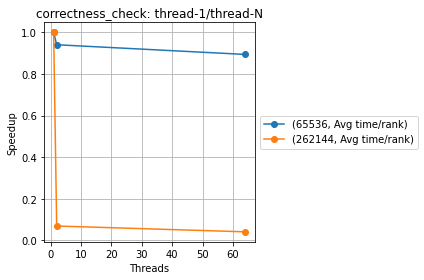

<Figure size 1440x1440 with 0 Axes>

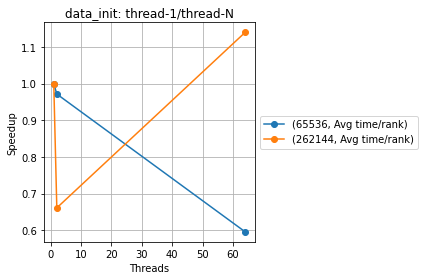

<Figure size 1440x1440 with 0 Axes>

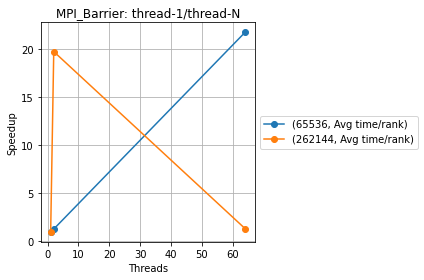

<Figure size 1440x1440 with 0 Axes>

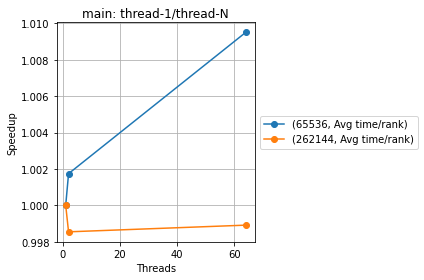

In [55]:
for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )

## Weak Scaling ---------------------------------------------------------------------------------------

In [18]:
# ctk.dataframe
tk = th.Thicket.from_caliperreader(glob("random-1/*.cali"))

In [19]:
# Performance data
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              3895774       1   
                                                  220829320     1   
                                                  320408187     1   
                                                  1893651476    1   
                                                  2279956365    1   
                                                  2567751592    1   
                                                  3982476170    1   
                                                  4100758762    1   
{'name': 'comm', 'type': 'function'}              3895774       3   
                                                  220829320     3   
                                                  320408187     3   
                                                  1893651476    3   
                                                  2279956365    3   
                                                  2567751592    3   
                                                  3982476170    3   
                                                  4100758762    3   
{'name': 'MPI_Barrier', 'type': 'function'}       3895774       8   
                                                  220829320     8   
                                                  320408187     8   
                                                  1893651476    8   
                                                  2279956365    8   
                                                  2567751592    8   
                                                  3982476170    8   
                                                  4100758762    8   
{'name': 'comm_large', 'type': 'function'}        3895774       4   
                                                  220829320     4   
                                                  320408187     4   
                                                  1893651476    4   
                                                  2279956365    4   
                                                  2567751592    4   
                                                  3982476170    4   
                                                  4100758762    4   
{'name': 'MPI_Gather', 'type': 'function'}        3895774       9   
                                                  220829320     9   
                                                  320408187     9   
                                                  1893651476    9   
                                                  2279956365    9   
                                                  2567751592    9   
                                                  3982476170    9   
                                                  4100758762    9   
{'name': 'MPI_Scatter', 'type': 'function'}       3895774       5   
                                                  220829320     5   
                                                  320408187     5   
                                                  1893651476    5   
                                                  2279956365    5   
                                                  2567751592    5   
                                                  3982476170    5   
                                                  4100758762    5   
{'name': 'comp', 'type': 'function'}              3895774       6   
                                                  220829320     6   
                                                  320408187     6   
                                                  1893651476    6   
                                                  2279956365    6   
                                                  2567751592    6   
                                                  3982476170    6   
                                                  4100758762    6   
{'name': 'comp_large', 'type': 'function'}        3895774   

In [20]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
3895774,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t262144-v64.cali,1701288649,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 262144, 64]",g,Quick sort,MPI,int,4,262144,Reversed,64,4,AI
220829320,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v16.cali,1701288287,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 16]",g,Quick sort,MPI,int,4,65536,Reversed,16,4,AI
320408187,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v8.cali,1701288287,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 8]",g,Quick sort,MPI,int,4,65536,Reversed,8,4,AI
1893651476,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v32.cali,1701288312,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 32]",g,Quick sort,MPI,int,4,65536,Reversed,32,4,AI
2279956365,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v2.cali,1701288257,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 2]",g,Quick sort,MPI,int,4,65536,Reversed,2,4,AI
2567751592,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v4.cali,1701288270,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 4]",g,Quick sort,MPI,int,4,65536,Reversed,4,4,AI
3982476170,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v64.cali,1701288310,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 64]",g,Quick sort,MPI,int,4,65536,Reversed,64,4,AI
4100758762,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t262144-v2.cali,1701288649,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 262144, 2]",g,Quick sort,MPI,int,4,262144,Reversed,2,4,AI


In [21]:
tk.statsframe.dataframe["time"] = 1
tk.tree()

"  _____ _     _      _        _   \n |_   _| |__ (_) ___| | _____| |_ \n   | | | '_ \\| |/ __| |/ / _ \\ __|\n   | | | | | | | (__|   <  __/ |_ \n   |_| |_| |_|_|\\___|_|\\_\\___|\\__|  v2023.3.0\n\n\x1b1.000\x1b main\x1b\n├─ \x1b1.000\x1b comm\x1b\n│  ├─ \x1b1.000\x1b MPI_Barrier\x1b\n│  └─ \x1b1.000\x1b comm_large\x1b\n│     ├─ \x1b1.000\x1b MPI_Gather\x1b\n│     └─ \x1b1.000\x1b MPI_Scatter\x1b\n├─ \x1b1.000\x1b comp\x1b\n│  └─ \x1b1.000\x1b comp_large\x1b\n├─ \x1b1.000\x1b correctness_check\x1b\n└─ \x1b1.000\x1b data_init\x1b\n\n\x1bLegend\x1b (Metric: time Min: 1.00 Max: 1.00)\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\nname\x1b User code    \x1b◀ \x1b Only in left graph    \x1b▶ \x1b Only in right graph\n"

In [22]:
gb = tk.groupby("InputSize")

2  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2ae394db9d00>, 262144: <thicket.thicket.Thicket object at 0x2ae394dd1c40>}


In [23]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [24]:
ctk.dataframe

65536  \
                                                              nid   
node                                              num_procs         
{'name': 'main', 'type': 'function'}              2             1   
                                                  4             1   
                                                  8             1   
                                                  16            1   
                                                  32            1   
                                                  64            1   
{'name': 'comm', 'type': 'function'}              2             3   
                                                  4             3   
                                                  8             3   
                                                  16            3   
                                                  32            3   
                                                  64            3   
{'name': 'MPI_Barrier', 'type': 'function'}       2             8   
                                                  4             8   
                                                  8             8   
                                                  16            8   
                                                  32            8   
                                                  64            8   
{'name': 'comm_large', 'type': 'function'}        2             4   
                                                  4             4   
                                                  8             4   
                                                  16            4   
                                                  32            4   
                                                  64            4   
{'name': 'MPI_Gather', 'type': 'function'}        2             9   
                                                  4             9   
                                                  8             9   
                                                  16            9   
                                                  32            9   
                                                  64            9   
{'name': 'MPI_Scatter', 'type': 'function'}       2             5   
                                                  4             5   
                                                  8             5   
                                                  16            5   
                                                  32            5   
                                                  64            5   
{'name': 'comp', 'type': 'function'}              2             6   
                                                  4             6   
                                                  8             6   
                                                  16            6   
                                                  32            6   
                                                  64            6   
{'name': 'comp_large', 'type': 'function'}        2             7   
                                                  4             7   
                                                  8             7   
                                                  16            7   
                                                  32            7   
                                                  64            7   
{'name': 'correctness_check', 'type': 'function'} 2            10   
                                                  4            10   
                                                  8            10   
                                                  16           10   
                                                  32           10   
                                                  64           10   
{'name': 'data_init', 'type': 'function'}         2             2   
                                                  4       

In [25]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "nid"), (262144, "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])


In [26]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [27]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Min time/rank"), (262144, "Min time/rank")], axis=1)

In [28]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Max time/rank"), (262144, "Max time/rank")], axis=1)

In [29]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Total time"), (262144, "Total time")], axis=1)

In [30]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [31]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

In [32]:
ctk.dataframe

65536        262144
                            Avg time/rank Avg time/rank
name              num_procs                            
main              2             12.289328    186.115255
                  4             12.303458           NaN
                  8             12.049066           NaN
                  16            12.319791           NaN
                  32            12.274873           NaN
                  64            12.194789    186.046847
comm              2              0.006173      0.001798
                  4              0.006733           NaN
                  8              0.000748           NaN
                  16             0.006459           NaN
                  32             0.006405           NaN
                  64             0.000810      0.005798
MPI_Barrier       2              0.000962      0.000054
                  4              0.001043           NaN
                  8              0.000054           NaN
                  16             0.000921           NaN
                  32             0.001049           NaN
                  64             0.000057      0.000794
comm_large        2              0.005161      0.001694
                  4              0.005639           NaN
                  8              0.000645           NaN
                  16             0.005477           NaN
                  32             0.005291           NaN
                  64             0.000687      0.004955
MPI_Gather        2              0.001081      0.000711
                  4              0.001255           NaN
                  8              0.000243           NaN
                  16             0.001222           NaN
                  32             0.001049           NaN
                  64             0.000238      0.001901
MPI_Scatter       2              0.004043      0.000944
                  4              0.004329           NaN
                  8              0.000370           NaN
                  16             0.004200           NaN
                  32             0.004185           NaN
                  64             0.000402      0.003008
comp              2             11.623534    185.436238
                  4             11.634053           NaN
                  8             11.523105           NaN
                  16            11.599679           NaN
                  32            11.624814           NaN
                  64            11.668105    185.360212
comp_large        2             11.623452    185.436145
                  4             11.633976           NaN
                  8             11.523028           NaN
                  16            11.599557           NaN
                  32            11.624720           NaN
                  64            11.668016    185.360118
correctness_check 2              0.000269      0.015496
                  4              0.000270           NaN
                  8              0.000276           NaN
                  16             0.000284           NaN
                  32             0.000269           NaN
                  64             0.000283      0.025946
data_init         2              0.002543      0.016232
                  4              0.003395           NaN
                  8              0.004125           NaN
                  16             0.004139           NaN
                  32             0.003851           NaN
                  64             0.004150      0.009408

In [33]:
function_names = set(ctk.dataframe.index.get_level_values('name'))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [34]:
# # df_1 = ctk.dataframe.loc['main',(65536)] # both column and row
# # df_1

# # df_1 = ctk.dataframe.loc['main','comm','comm_large','cudaMemcpy_1','comp','comp_large','data_init'] # all rows 1 column


# # df_1 = ctk.dataframe.loc[:] # all rows 1 column

# # df_1

# df_1 = ctk.dataframe.loc['main'] # all rows 1 column
# # df_1 = ctk.dataframe
# # df_1
# # df_1 = ctk.dataframe.reset_index().drop([("name", "")], axis=1)
# # df_1
# # df_1 = df_1.loc[]

# df_2 = df_1.loc[[64,128,256,512]]
# df_2

# # df_1 = ctk.dataframe.loc['main'] # all columns 1 row


# # df_2 =  ctk.dataframe.reset_index().drop([(262144),(1048576),(4194304)], axis=1)
# # df_2

In [35]:
import matplotlib.pyplot as plt
def plot_pandas(df, title, xlabel, ylabel, loglog,figsize=(20, 20) ):
    plt.figure(figsize=figsize)
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
        
    )
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()  
    return plot

<Figure size 1440x1440 with 0 Axes>

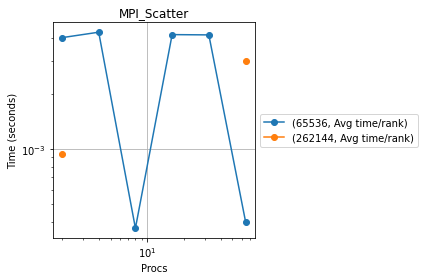

<Figure size 1440x1440 with 0 Axes>

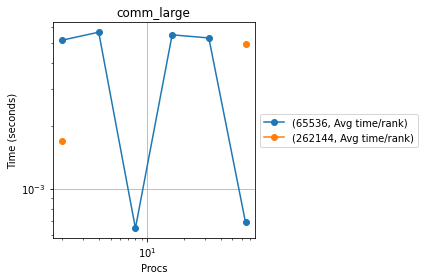

<Figure size 1440x1440 with 0 Axes>

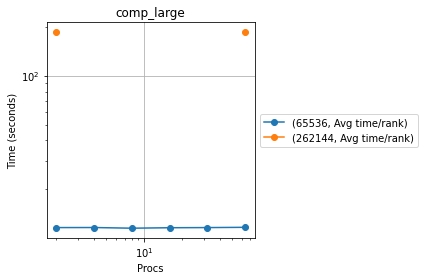

<Figure size 1440x1440 with 0 Axes>

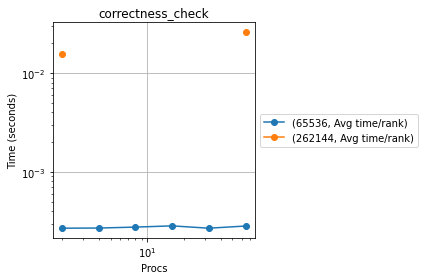

<Figure size 1440x1440 with 0 Axes>

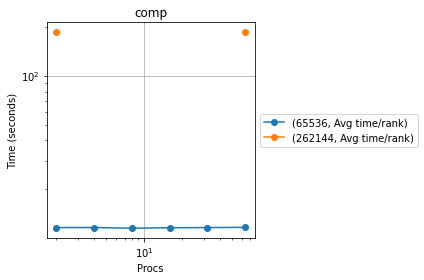

<Figure size 1440x1440 with 0 Axes>

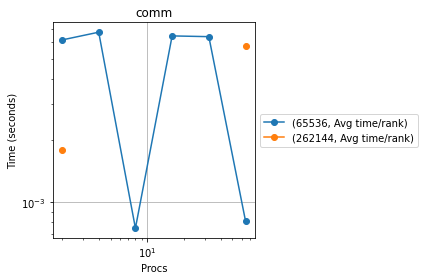

<Figure size 1440x1440 with 0 Axes>

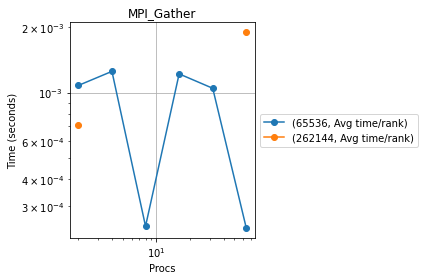

<Figure size 1440x1440 with 0 Axes>

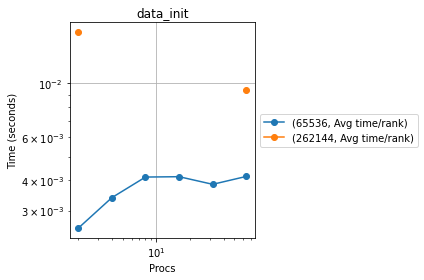

<Figure size 1440x1440 with 0 Axes>

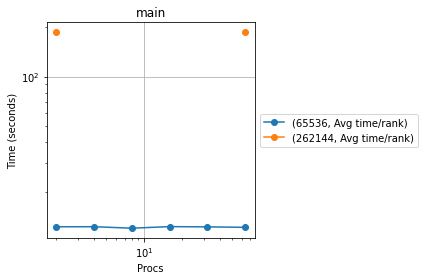

<Figure size 1440x1440 with 0 Axes>

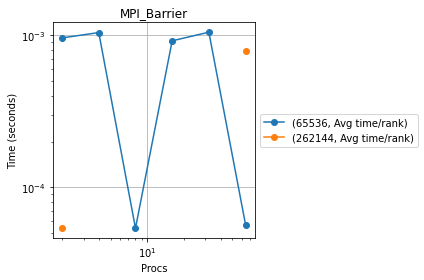

In [36]:
# for matrix in matrix_sizes:
    
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Procs",
        ylabel="Time (seconds)",
        loglog=True,
        figsize=(20, 20)
    )
    plt.show()

In [2]:
ctk.dataframe

NameError: name 'ctk' is not defined

## STRONG SCALING ------------------------------------------------------------------------------------


In [69]:
# ctk.dataframe
tk = th.Thicket.from_caliperreader(glob("everything-rand/*.cali"))

In [70]:
# Performance data
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              54885290      1   
                                                  99817535      1   
                                                  188190351     1   
                                                  219836149     1   
                                                  481757356     1   
                                                  550267781     1   
                                                  562384393     1   
                                                  610381560     1   
                                                  845648455     1   
                                                  910162479     1   
                                                  918950610     1   
                                                  963248331     1   
                                                  1109919902    1   
                                                  1110939128    1   
                                                  1123377555    1   
                                                  1402708312    1   
                                                  1516800236    1   
                                                  1544778189    1   
                                                  1558669149    1   
                                                  1633550427    1   
                                                  1774904598    1   
                                                  2235504543    1   
                                                  2487360699    1   
                                                  2495229883    1   
                                                  2541841823    1   
                                                  2548714347    1   
                                                  2645631421    1   
                                                  2697060555    1   
                                                  2738459985    1   
                                                  2802931434    1   
                                                  2972821872    1   
                                                  3155285795    1   
                                                  3277149599    1   
                                                  3285000207    1   
                                                  3798993007    1   
                                                  3939806092    1   
                                                  4089540971    1   
                                                  4133351663    1   
                                                  4189618317    1   
                                                  4222873561    1   
{'name': 'comm', 'type': 'function'}              54885290      3   
                                                  99817535      3   
                                                  188190351     3   
                                                  219836149     3   
                                                  481757356     3   
                                                  550267781     3   
                                                  562384393     3   
                                                  610381560     3   
                                                  845648455     3   
                                                  910162479     3   
                                                  918950610     3   
                                                  963248331     3   
                                                  1109919902    3   
                                                  1110939128    3   
                                                  1123377555    3   
                                                  1402708312    3   
                                                  1516800236

In [71]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
54885290,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v16.cali,1701288287,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 16]",g,Quick sort,MPI,int,4,65536,Reversed,16,4,AI
99817535,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v256.cali,1701195414,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 256]",g,Quick sort,MPI,int,4,65536,Sorted,256,4,AI
188190351,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v32.cali,1701195399,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 32]",g,Quick sort,MPI,int,4,65536,Sorted,32,4,AI
219836149,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v128.cali,1701195900,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 128]",g,Quick sort,MPI,int,4,65536,1% perturbed,128,4,AI
481757356,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v8.cali,1701195881,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 8]",g,Quick sort,MPI,int,4,65536,1% perturbed,8,4,AI
550267781,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v512.cali,1701195619,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 512]",g,Quick sort,MPI,int,4,65536,Reversed,512,4,AI
562384393,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v2.cali,1701288257,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 2]",g,Quick sort,MPI,int,4,65536,Reversed,2,4,AI
610381560,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v1024.cali,1701195415,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 1024]",g,Quick sort,MPI,int,4,65536,Sorted,1024,4,AI
845648455,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t65536-v512.cali,1701195415,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./quicksort, 65536, 512]",g,Quick sort,MPI,int,4,65536,Sorted,512,4,AI


In [72]:
tk.statsframe.dataframe["time"] = 1
tk.tree()

"  _____ _     _      _        _   \n |_   _| |__ (_) ___| | _____| |_ \n   | | | '_ \\| |/ __| |/ / _ \\ __|\n   | | | | | | | (__|   <  __/ |_ \n   |_| |_| |_|_|\\___|_|\\_\\___|\\__|  v2023.3.0\n\n\x1b1.000\x1b main\x1b\n├─ \x1b1.000\x1b comm\x1b\n│  ├─ \x1b1.000\x1b MPI_Barrier\x1b\n│  └─ \x1b1.000\x1b comm_large\x1b\n│     ├─ \x1b1.000\x1b MPI_Gather\x1b\n│     └─ \x1b1.000\x1b MPI_Scatter\x1b\n├─ \x1b1.000\x1b comp\x1b\n│  └─ \x1b1.000\x1b comp_large\x1b\n├─ \x1b1.000\x1b correctness_check\x1b\n└─ \x1b1.000\x1b data_init\x1b\n\n\x1bLegend\x1b (Metric: time Min: 1.00 Max: 1.00)\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\nname\x1b User code    \x1b◀ \x1b Only in left graph    \x1b▶ \x1b Only in right graph\n"

In [75]:
gb = tk.groupby("num_procs")

11  thickets created...
{1: <thicket.thicket.Thicket object at 0x2b3b034953d0>, 2: <thicket.thicket.Thicket object at 0x2b3b03732760>, 4: <thicket.thicket.Thicket object at 0x2b3b03669d00>, 8: <thicket.thicket.Thicket object at 0x2b3b0374b550>, 16: <thicket.thicket.Thicket object at 0x2b3b0373ba30>, 32: <thicket.thicket.Thicket object at 0x2b3b0320a1c0>, 64: <thicket.thicket.Thicket object at 0x2b3b0373e6d0>, 128: <thicket.thicket.Thicket object at 0x2b3b0383daf0>, 256: <thicket.thicket.Thicket object at 0x2b3b03617fd0>, 512: <thicket.thicket.Thicket object at 0x2b3b03204b20>, 1024: <thicket.thicket.Thicket object at 0x2b3b03209f70>}


In [76]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="InputType"
)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [166]:
ctk.dataframe

1perturbed  \
                                                                nid   
node                                         num_threads              
{'name': 'main', 'type': 'function'}         64                   1   
                                             128                  1   
                                             256                  1   
                                             512                  1   
{'name': 'comm', 'type': 'function'}         64                   3   
                                             128                  3   
                                             256                  3   
                                             512                  3   
{'name': 'comm_large', 'type': 'function'}   64                   4   
                                             128                  4   
                                             256                  4   
                                             512                  4   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64                   5   
                                             128                  5   
                                             256                  5   
                                             512                  5   
{'name': 'comp', 'type': 'function'}         64                   6   
                                             128                  6   
                                             256                  6   
                                             512                  6   
{'name': 'comp_large', 'type': 'function'}   64                   7   
                                             128                  7   
                                             256                  7   
                                             512                  7   
{'name': 'data_init', 'type': 'function'}    64                   2   
                                             128                  2   
                                             256                  2   
                                             512                  2   

                                                                         \
                                                           spot.channel   
node                                         num_threads                  
{'name': 'main', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comm', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comm_large', 'type': 'function'}   64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comp', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comp_large', 'type': 'function'}   64           regionprofile   
                                             128       

In [168]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "spot.channel"), ("Random", "spot.channel"), ("ReverseSorted", "spot.channel"), ("Sorted", "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "nid"), ("Random", "nid"), ("ReverseSorted", "nid"), ("Sorted", "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [169]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [170]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "Min time/rank"), ("Random", "Min time/rank"), ("ReverseSorted", "Min time/rank"), ("Sorted", "Min time/rank")], axis=1)

In [171]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "Max time/rank"), ("Random", "Max time/rank"), ("ReverseSorted", "Max time/rank"), ("Sorted", "Max time/rank")], axis=1)

In [172]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "Avg time/rank"), ("Random", "Avg time/rank"), ("ReverseSorted", "Avg time/rank"), ("Sorted", "Avg time/rank")], axis=1)

In [173]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [174]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

In [175]:
ctk.dataframe

1perturbed     Random ReverseSorted     Sorted
                         Total time Total time    Total time Total time
name         num_threads                                               
main         64            0.333989   0.495571      0.314719   0.473958
             128           0.334907   0.465160      0.318824   0.494237
             256           0.321497   0.604006      0.319632   0.332196
             512           0.320888   0.609716      0.319725   0.332821
comm         64            0.000143   0.000164      0.000160   0.000163
             128           0.000156   0.000186      0.000143   0.000161
             256           0.000151   0.000151      0.000144   0.000143
             512           0.000152   0.000134      0.000152   0.000144
comm_large   64            0.000110   0.000130      0.000128   0.000130
             128           0.000121   0.000153      0.000111   0.000129
             256           0.000119   0.000118      0.000112   0.000111
             512           0.000110   0.000108      0.000121   0.000112
cudaMemcpy_1 64            0.000097   0.000115      0.000113   0.000114
             128           0.000104   0.000137      0.000097   0.000114
             256           0.000098   0.000103      0.000098   0.000097
             512           0.000097   0.000094      0.000106   0.000098
comp         64            0.000435   0.000451      0.000455   0.000449
             128           0.000478   0.000440      0.000418   0.000470
             256           0.000424   0.000483      0.000418   0.000425
             512           0.000428   0.000389      0.000414   0.000399
comp_large   64            0.000426   0.000441      0.000446   0.000440
             128           0.000468   0.000430      0.000409   0.000460
             256           0.000415   0.000473      0.000410   0.000416
             512           0.000419   0.000380      0.000405   0.000390
data_init    64            0.001182   0.000820      0.000280   0.000236
             128           0.001179   0.000865      0.000277   0.000246
             256           0.001178   0.000824      0.000281   0.000225
             512           0.001190   0.000823      0.000282   0.000245

In [150]:
# ctk.dataframe = ctk.dataframe.loc[:,(65536)]

# df_1 = ctk.dataframe.loc['main',(65536)] # both column and row
# df_1
# ctk.dataframe

In [176]:
function_names = set(ctk.dataframe.index.get_level_values('name'))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [177]:
import matplotlib.pyplot as plt
def plot_pandas(df, title, xlabel, ylabel, loglog,figsize=(20, 20) ):
    plt.figure(figsize=figsize)
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
        
    )
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()  
    return plot

<Figure size 1440x1440 with 0 Axes>

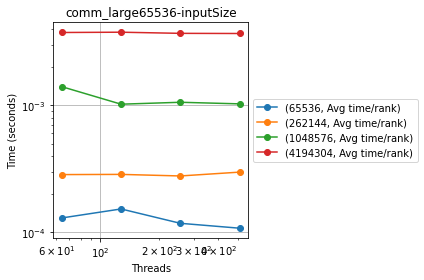

<Figure size 1440x1440 with 0 Axes>

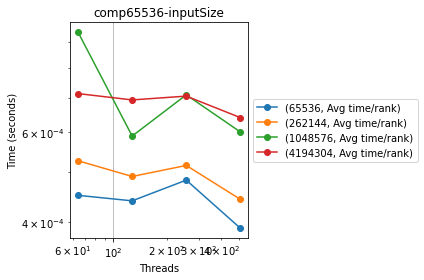

<Figure size 1440x1440 with 0 Axes>

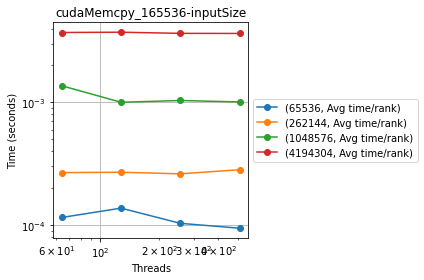

<Figure size 1440x1440 with 0 Axes>

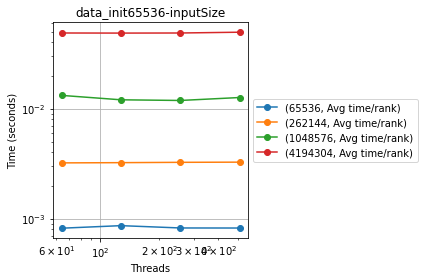

<Figure size 1440x1440 with 0 Axes>

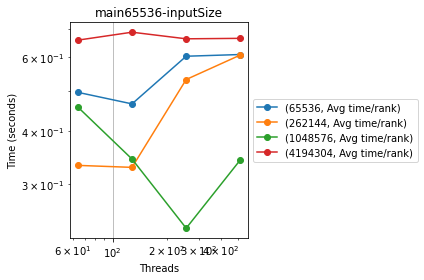

<Figure size 1440x1440 with 0 Axes>

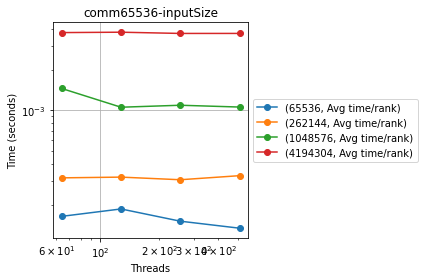

<Figure size 1440x1440 with 0 Axes>

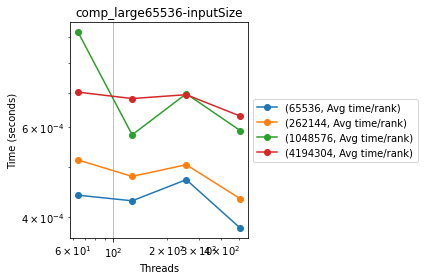

In [231]:
# for matrix in matrix_sizes:
    
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name+"65536-inputSize",
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True,
        figsize=(20, 20)
    )
    plt.show()